# Hierarchical Clustering

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from __future__ import division
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
import theano
import cv2
from sklearn import preprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load the Churn Data

In [50]:
# def normalize(col):
#     return (col - np.mean(col)) / np.std(col)

# def load_data(filename):
#     df = pd.read_csv(filename)

#     # Drop the state and phone columns
#     del df['State']
#     del df['Area Code']
#     del df['Phone']

#     # Binarize remaining variables
#     df["Int'l Plan"] = (df["Int\'l Plan"] == 'yes').astype(int)
#     df["VMail Plan"] = (df["VMail Plan"] == 'yes').astype(int)
#     df['Churn?'] = (df['Churn?'] == 'True.').astype(int)

#     # Normalize columns so that cosine similarity is the same as correlation
#     arr = np.apply_along_axis(normalize, 1, df.values)
#     return arr, df.columns

# arr, cols = load_data('../data/churn.csv')

## Perform hierarchical clustering on observations (columns)

/Users/peternygaard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


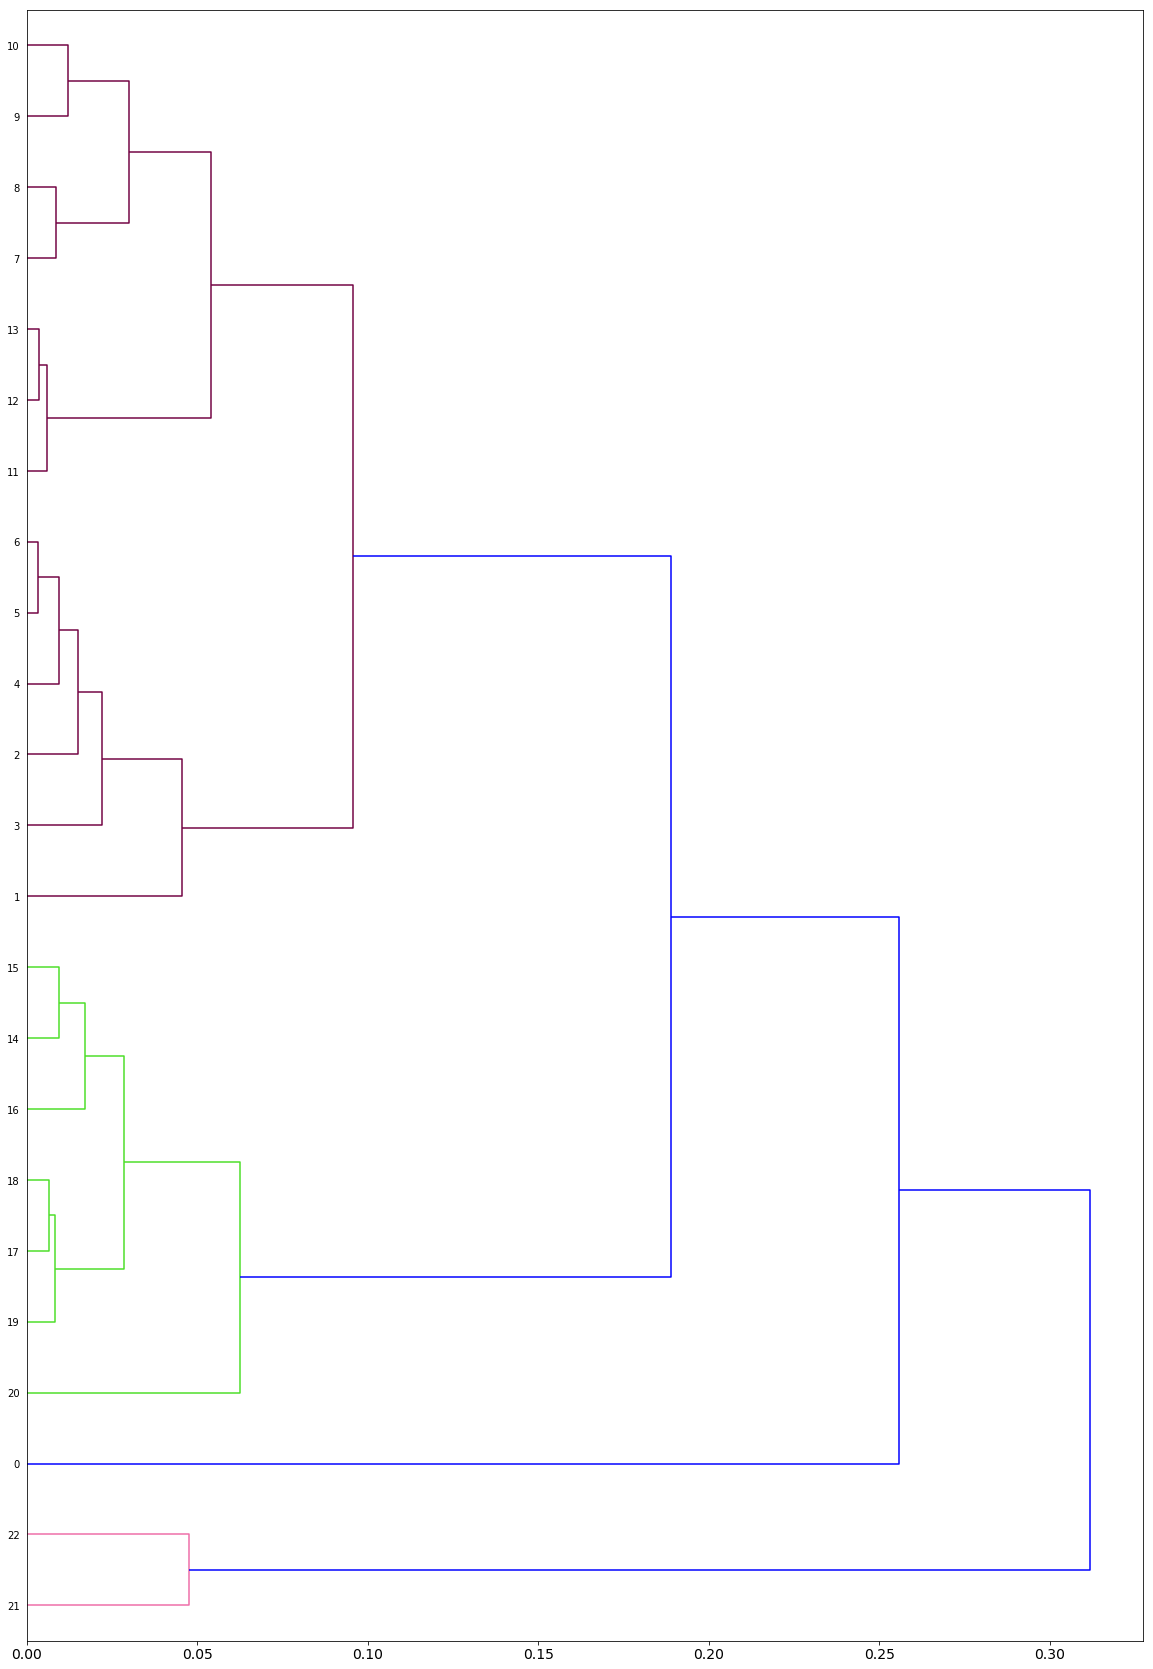

In [74]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
import scipy.spatial.distance as ssd
from faker import Factory

fake = Factory.create()
colorList = []

for i in range(5000):
    colorList.append(fake.hex_color())

set_link_color_palette(colorList)

df = pd.read_csv('2016-17_advanced.csv')
df = df[df['MP'] >= 500]
df['Player_ID'] = df['Player_ID'].astype(int)
df.reset_index(inplace=True, drop=True)
y = np.array(df['OBPM'].values)
pid = np.array(df['Player_ID'].values)
yr = np.array(df['Yr'].value_counts().index.sort_values())
images = []
for i in range(len(yr)):
    images.append(cv2.imread('thumbnails/thumbnail_NBA_{0}-{1}.png'.format(str(yr[i]-1), str(yr[i])[-2:]), 0))
X = np.array(images)
flat_exes = []
for i in range(len(X)):
    flat_exes.append(X[i].flatten())
X = np.array(flat_exes)
# Create distance matrix on columns using cosine distance
# convert the redundant n*n square matrix form into a condensed nC2 array
dist = ssd.squareform(pdist(X, 'cosine'))
clust = linkage(dist, method='complete')

fig, ax = plt.subplots(figsize=(20,30))
_ = dendrogram(clust, color_threshold=.15, orientation='right', ax=ax)
_ = plt.xticks(fontsize=14)

In [52]:
R = dendrogram(clust,
                color_threshold=2, no_plot=True)

In [53]:
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

lineups = get_cluster_classes(R)

In [54]:
lineups

#374521,"['4608', '4609', '3455', '7023', '7022']"
#a0d5c5,"['6428', '7407', '7103', '7430', '7559', '6131', '5138']"
#9cb881,"['7528', '7560', '4453', '7060', '3380']"
#67df9c,"['2333', '7098', '5683', '5882', '6959', '5575']"
#9d010d,"['5114', '5115', '6960', '6962', '5595']"
#a9f0cc,"['5573', '5574', '5386']"
#8cb9f7,"['3006', '4212', '5391', '6350', '6659', '6025', '666', '4142', '669', '2948', '1142', '1543', '5837', '3819', '4932', '494', '2625', '506', '5173', '5385', '2624', '5175', '837', '659', '5209', '2273', '4225']"
#44916b,"['3198', '3199', '3196', '2267', '1230', '3823', '1228', '1231', '658', '3822', '2159', '250']"
#bf6598,"['1731', '6806', '378', '938', '2158', '4118', '398', '1800', '3969', '289', '3816', '1316', '3142', '289']"
#e8c3a6,"['2160', '6178', '399', '423', '5826', '577']"
#1926f8,"['2626', '4175', '282', '4747', '1542', '5510', '2774', '5084', '970', '1945', '3817']"


In [58]:
comps = ['6610', '7396', '4627', '6331', '4985', '5232', '2629', '6631', '6886', '5230', '6442', '4387', '7305', '6442']

thing = []

for i in comps:
    thing.append([df['Player'][int(i)], df['Yr'][int(i)], df['Age'][int(i)], df['TS%'][int(i)]])
    
loadout = pd.DataFrame(thing)
loadout.rename(columns={0:'Player', 1: 'Year', 2: 'Age', 3: 'TS%'},inplace=True)
loadout = loadout.sort_values('Year', ascending=False)
loadout.reset_index(inplace=True, drop=True)
loadout

,Player,Year,Age,TS%
0,Jamal Murray,2019,21,0.538
1,CJ McCollum,2019,27,0.553
2,Lance Stephenson,2018,27,0.495
3,Bradley Beal,2018,24,0.564
4,Kevin Durant,2018,29,0.640
5,Jerian Grant,2018,25,0.528
6,Kevin Durant,2016,27,0.634
7,Kris Humphries,2016,30,0.517
8,Isaiah Thomas,2014,24,0.574
9,Raymond Felton,2012,27,0.491


In [57]:
df[df['Player'] == "Jamal Murray"]

,Player,Player_ID,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Yr
7396,Jamal Murray,1627750,PG,21,DEN,75,2447,16.0,0.538,0.353,...,24.9,2.8,2.3,5.1,0.100,1.1,-1.0,0.1,1.3,2019
7397,Jamal Murray,1627750,PG,20,DEN,81,2565,16.1,0.576,0.411,...,22.8,4.3,1.2,5.5,0.103,1.8,-2.0,-0.2,1.2,2018
7398,Jamal Murray,1627750,SG,19,DEN,82,1764,11.9,0.518,0.471,...,21.6,0.6,0.7,1.4,0.037,-0.5,-2.1,-2.6,-0.3,2017
